# Conway's Game of Life [![Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/maxencefaldor/cax/blob/main/examples/11_life.ipynb)

## Installation

You will need Python 3.10 or later, and a working JAX installation. For example, you can install JAX with:

In [ ]:
%pip install -U "jax[cuda12]"

Then, install CAX from PyPi:

In [ ]:
%pip install -U "cax[examples]"

## Import

In [ ]:
import jax
import jax.numpy as jnp
import mediapy
from flax import nnx

from cax.models.life import Life

## Configuration

In [3]:
seed = 0

spatial_dims = (32, 32)

num_steps = 128

key = jax.random.key(seed)
rngs = nnx.Rngs(seed)

## Model

In [5]:
ca = Life(rngs=rngs)

## Sample initial state

In [4]:
def sample_state():
	"""Sample a state with a glider for the Game of Life."""
	state = jnp.zeros((*spatial_dims, 1))

	mid_x, mid_y = spatial_dims[0] // 2, spatial_dims[1] // 2
	glider = jnp.array(
		[
			[0.0, 1.0, 0.0],
			[0.0, 0.0, 1.0],
			[1.0, 1.0, 1.0],
		]
	)
	return state.at[mid_x : mid_x + 3, mid_y : mid_y + 3, 0].set(glider)

## Run

In [ ]:
state_init = sample_state()
state_final, states = ca(state_init, num_steps=num_steps)

## Visualize

""

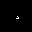

In [7]:
states = jnp.concatenate([state_init[None], states])
frames = jax.vmap(ca.render)(states)

mediapy.show_video(frames, width=256, height=256, codec="gif")